# **Predicting Happiness Scores: A Machine Learning Approach**
**Exploring the Relationship Between Economic and Social Factors and Happiness**
====================================================================================
This notebook explores the use of machine learning techniques to predict happiness scores based on various factors such as GDP per capita, healthy life expectancy, social support, and more. We will train and evaluate different models, including decision trees and random forests, to identify the most effective approach. Through this analysis, we aim to gain insights into the key drivers of happiness and develop a robust predictive model.

# 1. Importing Libraries
### Libraries Used:
1. **pandas**: Data manipulation and analysis
2. **seaborn**: Data visualization
3. **numpy**: Numerical operations
4. **matplotlib**: Plotting and visualization
5. **scikit-learn**: Machine learning models and utilities

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Loading the Dataset
The World Happiness Report 2024 dataset is loaded into a pandas DataFrame from a CSV file named `final_data.csv`.

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df

,Country,Rank,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Age Below 30 Score,Age Above 60 Score,Age 30-44 Score,Age 45-59 Score
0,Finland,1,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,7.300,7.912,7.883800,7.868200
1,Denmark,2,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,7.329,7.916,7.540260,7.546740
2,Iceland,3,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,7.598,7.585,7.456012,7.460988
3,Sweden,4,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,7.026,7.588,7.372880,7.389120
4,Israel,5,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,7.667,6.854,7.423066,7.419934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Congo (Kinshasa),136,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,3.441,2.703,3.516969,3.519031
136,Sierra Leone,137,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,3.225,3.471,3.137864,3.146136
137,Lesotho,138,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,3.700,2.808,3.114573,3.121427
138,Lebanon,139,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,2.997,2.490,2.673950,2.667050


# 3. Checking for Missing Values
This cell checks for missing values in the dataset by counting the number of null values in each column.

In [5]:
df.isnull().sum()

Country                                       0
Rank                                          0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
Age Below 30 Score                            0
Age Above 60 Score                            0
Age 30-44 Score                               0
Age 45-59 Score                               0
dtype: int64

# 4. Visualizing Missing Values
A heatmap is used to visualize the missing values in the dataset, providing a clearer representation of the null values.

<Axes: >

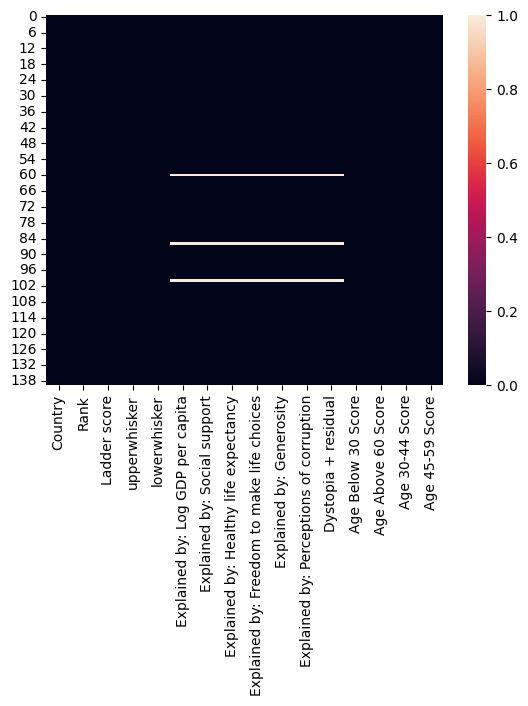

In [6]:
sns.heatmap(df.isnull())

# 5. Handling Missing Values
The `dropna()` function is used to remove rows with missing values from the dataset, resulting in a cleaned dataset.

In [7]:
df = df.dropna()

In [8]:
df

,Country,Rank,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Age Below 30 Score,Age Above 60 Score,Age 30-44 Score,Age 45-59 Score
0,Finland,1,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,7.300,7.912,7.883800,7.868200
1,Denmark,2,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,7.329,7.916,7.540260,7.546740
2,Iceland,3,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,7.598,7.585,7.456012,7.460988
3,Sweden,4,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,7.026,7.588,7.372880,7.389120
4,Israel,5,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,7.667,6.854,7.423066,7.419934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Congo (Kinshasa),136,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,3.441,2.703,3.516969,3.519031
136,Sierra Leone,137,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,3.225,3.471,3.137864,3.146136
137,Lesotho,138,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,3.700,2.808,3.114573,3.121427
138,Lebanon,139,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,2.997,2.490,2.673950,2.667050


# 6. Summary Statistics
The `describe()` function is used to generate summary statistics for the dataset, providing an overview of the central tendency and dispersion of the data.

In [10]:
df.describe()

,Rank,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Age Below 30 Score,Age Above 60 Score,Age 30-44 Score,Age 45-59 Score
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,70.226277,5.545686,5.658650,5.432693,1.379066,1.131255,0.520445,0.624569,0.148051,0.155577,1.586774,5.841431,5.312620,5.518012,5.518682
std,40.886499,1.180367,1.164368,1.197052,0.423493,0.336110,0.164605,0.158282,0.073209,0.127112,0.536841,1.176243,1.292007,1.177076,1.179262
min,1.000000,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000,1.827000,1.456000,1.805547,1.795453
25%,35.000000,4.657000,4.779000,4.535000,1.078000,0.915000,0.400000,0.533000,0.096000,0.069000,1.318000,4.906000,4.417000,4.682641,4.691359
50%,70.000000,5.816000,5.927000,5.679000,1.430000,1.236000,0.549000,0.641000,0.138000,0.122000,1.653000,6.305000,5.418000,5.756969,5.758031
75%,106.000000,6.442000,6.522000,6.339000,1.752000,1.390000,0.648000,0.735000,0.194000,0.196000,1.884000,6.732000,6.164000,6.424129,6.425081
max,140.000000,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000,7.759000,7.916000,7.883800,7.868200


# 7. Distribution of Ladder Score
A histogram is used to visualize the distribution of the 'Ladder score' column in the dataset. This plot provides insights into the shape of the distribution, including:
- Central tendency (mean, median)
- Dispersion (range, variance)
- Skewness and kurtosis
- Presence of outliers or multimodality
The `sns.histplot()` function from Seaborn is utilized to create a visually appealing and informative histogram.

In [ ]:
sns.histplot(df['Ladder score'])

# 8. Global Happiness Choropleth Map
An interactive choropleth map is created to visualize the global happiness rankings. The map displays the happiness rank of each country, providing a geographical perspective on happiness levels worldwide.
- **Locations**: Country names are used to map the data to specific countries.
- **Colorbar**: The colorbar represents the happiness ranking, with colors indicating the relative ranking of each country.
- **Interactivity**: The plotly library enables interactive visualization, allowing users to hover over countries to view specific rankings and country names.
This visualization facilitates comparison of happiness levels across different regions and countries.

In [12]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False),
             width=800,  
             height=500)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# 9. GDP per capita Choropleth Map
An interactive choropleth map is created to visualize the GDP per capita across different countries. The map displays the log GDP per capita values, highlighting the economic disparities between nations.
- **Locations**: Country names are used to map the data to specific countries.
- **Colorbar**: The colorbar represents the log GDP per capita values, with colors indicating the relative economic prosperity of each country.
- **Insights**: This visualization helps identify patterns and correlations between GDP per capita and happiness rankings, providing valuable insights into the relationship between economic factors and well-being.

In [13]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Explained by: Log GDP per capita'], 
           text = df['Country'],
           colorbar = {'title':'GDP per capita'})
layout = dict(title = 'GDP per capita',
             geo = dict(showframe = False),
             width=800,  
             height=500)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# 10. Social Support Choropleth Map
An interactive choropleth map is created to visualize the social support levels across different countries. The map displays the social support values, highlighting the varying degrees of social cohesion and support networks worldwide.
- **Locations**: Country names are used to map the data to specific countries.
- **Colorbar**: The colorbar represents the social support values, with colors indicating the relative strength of social support systems in each country.
- **Insights**: This visualization helps identify patterns and correlations between social support and happiness rankings, providing valuable insights into the impact of social relationships on well-being.

In [14]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Explained by: Social support'], 
           text = df['Country'],
           colorbar = {'title':'Social support'})
layout = dict(title = 'Social support', 
             geo = dict(showframe = False),
             width=800,  
             height=500)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# 11. Freedom to Make Life Choices Choropleth Map
An interactive choropleth map is created to visualize the freedom to make life choices across different countries. The map displays the freedom values, highlighting the varying degrees of autonomy and liberty worldwide.
- **Locations**: Country names are used to map the data to specific countries.
- **Colorbar**: The colorbar represents the freedom values, with colors indicating the relative level of freedom to make life choices in each country.
- **Insights**: This visualization helps identify patterns and correlations between freedom and happiness rankings, providing valuable insights into the impact of autonomy on well-being.

In [16]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Explained by: Freedom to make life choices'], 
           text = df['Country'],
           colorbar = {'title':'Freedom to make life choices'})
layout = dict(title = 'Freedom to make life choices', 
             geo = dict(showframe = False),
             width=800,  
             height=500)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# 12. Generosity Choropleth Map
An interactive choropleth map is created to visualize the generosity levels across different countries. The map displays the generosity values, highlighting the varying degrees of charitable behavior and prosocial actions worldwide.
- **Locations**: Country names are used to map the data to specific countries.
- **Colorbar**: The colorbar represents the generosity values, with colors indicating the relative level of generosity in each country.
- **Insights**: This visualization helps identify patterns and correlations between generosity and happiness rankings, providing valuable insights into the impact of prosocial behavior on well-being.

In [17]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Explained by: Generosity'], 
           text = df['Country'],
           colorbar = {'title':'Generosity'})
layout = dict(title = 'Generosity', 
             geo = dict(showframe = False),
             width=800,  
             height=500)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# 13. Perceptions of Corruption Choropleth Map
An interactive choropleth map is created to visualize the perceptions of corruption levels across different countries. The map displays the corruption perception values, highlighting the varying degrees of perceived corruption worldwide.
- **Locations**: Country names are used to map the data to specific countries.
- **Colorbar**: The colorbar represents the corruption perception values, with colors indicating the relative level of perceived corruption in each country.
- **Insights**: This visualization helps identify patterns and correlations between corruption perceptions and happiness rankings, providing valuable insights into the impact of governance and institutional trust on well-being.

In [19]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Explained by: Perceptions of corruption'], 
           text = df['Country'],
           colorbar = {'title':'Perceptions of corruption'})
layout = dict(title = 'Perceptions of corruption', 
             geo = dict(showframe = False),
             width=800,  
             height=500)
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# 14. Scatter Plots for Happiness Score vs. Contributing Factors
A series of scatter plots are created to visualize the relationships between the happiness score and various contributing factors.
- **First row**:
  - GDP per capita vs. Happiness score
  - Social support vs. Happiness score
  - Healthy life expectancy vs. Happiness score
- **Second row**:
  - Freedom to make life choices vs. Happiness score
  - Generosity vs. Happiness score
  - Perceptions of corruption vs. Happiness score
These plots help identify correlations and patterns between the happiness score and each contributing factor, providing insights into the factors that most strongly influence happiness.

Text(0, 0.5, 'Happiness score')

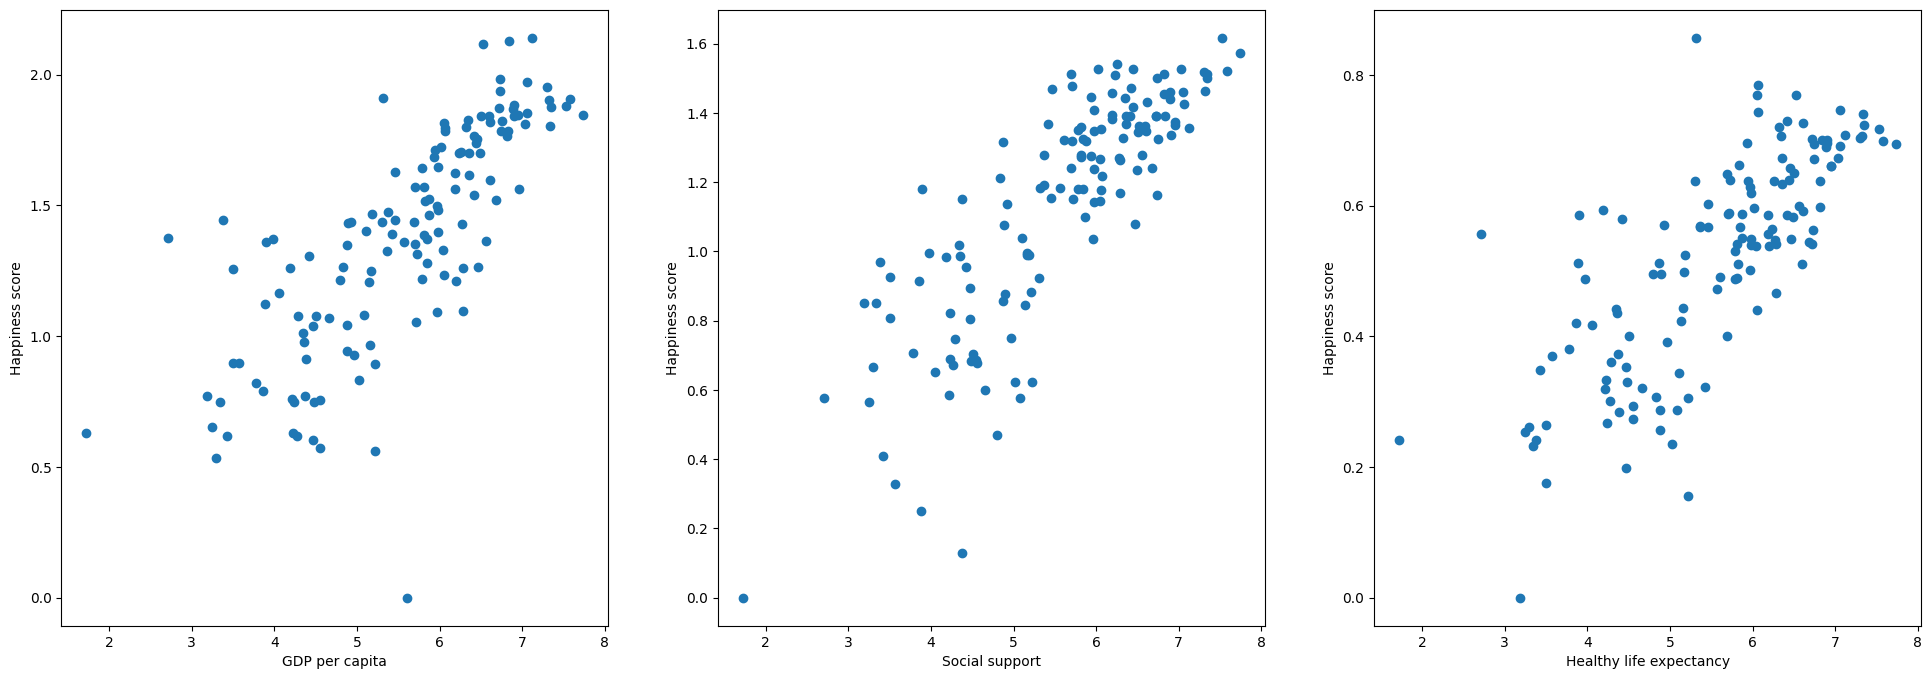

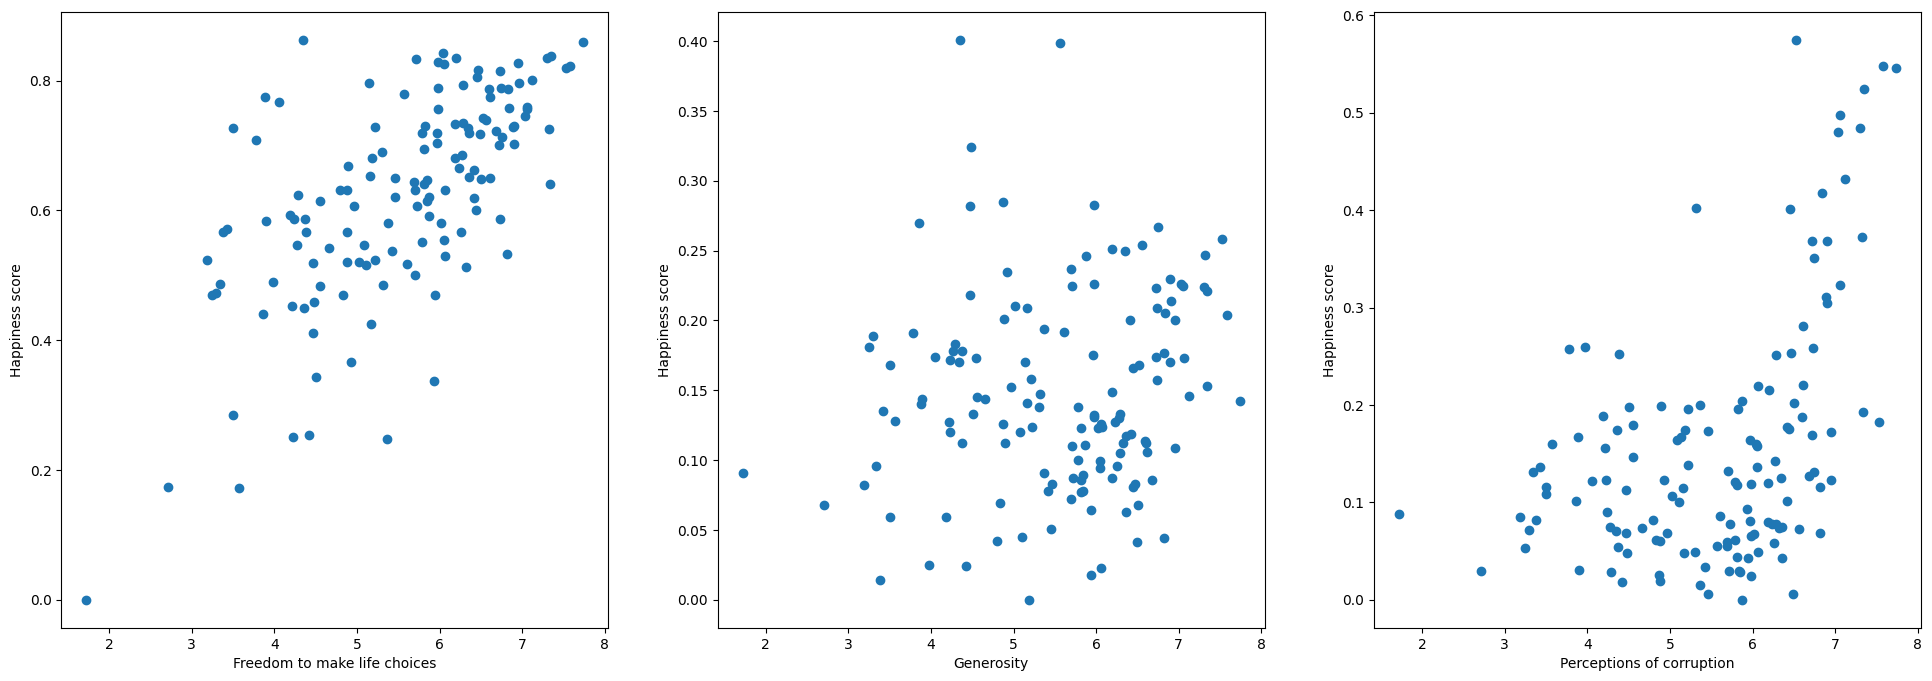

In [16]:
plt.figure(figsize=(24,8))

plt.subplot(1,3,1)
plt.scatter( df['Ladder score'], df['Explained by: Log GDP per capita'])
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')

plt.subplot(1,3,2)
plt.scatter( df['Ladder score'], df['Explained by: Social support'])
plt.xlabel('Social support')
plt.ylabel('Happiness score')

plt.subplot(1,3,3)
plt.scatter( df['Ladder score'], df['Explained by: Healthy life expectancy'])
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness score')

plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.scatter( df['Ladder score'], df['Explained by: Freedom to make life choices'])
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')

plt.subplot(1,3,2)
plt.scatter( df['Ladder score'], df['Explained by: Generosity'])
plt.xlabel('Generosity')
plt.ylabel('Happiness score')

plt.subplot(1,3,3)
plt.scatter( df['Ladder score'], df['Explained by: Perceptions of corruption'])
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness score')

# 15. Pairplot with Regression Lines
A pairplot is created to visualize the relationships between the various factors contributing to happiness. The plot includes regression lines to highlight the correlations between each pair of factors.
- **Diagonal plots**: Histograms of each factor
- **Upper and lower triangle plots**: Scatter plots with regression lines showing the relationships between each pair of factors
This visualization helps identify patterns, correlations, and potential relationships between the factors, providing insights into the complex interactions driving happiness.

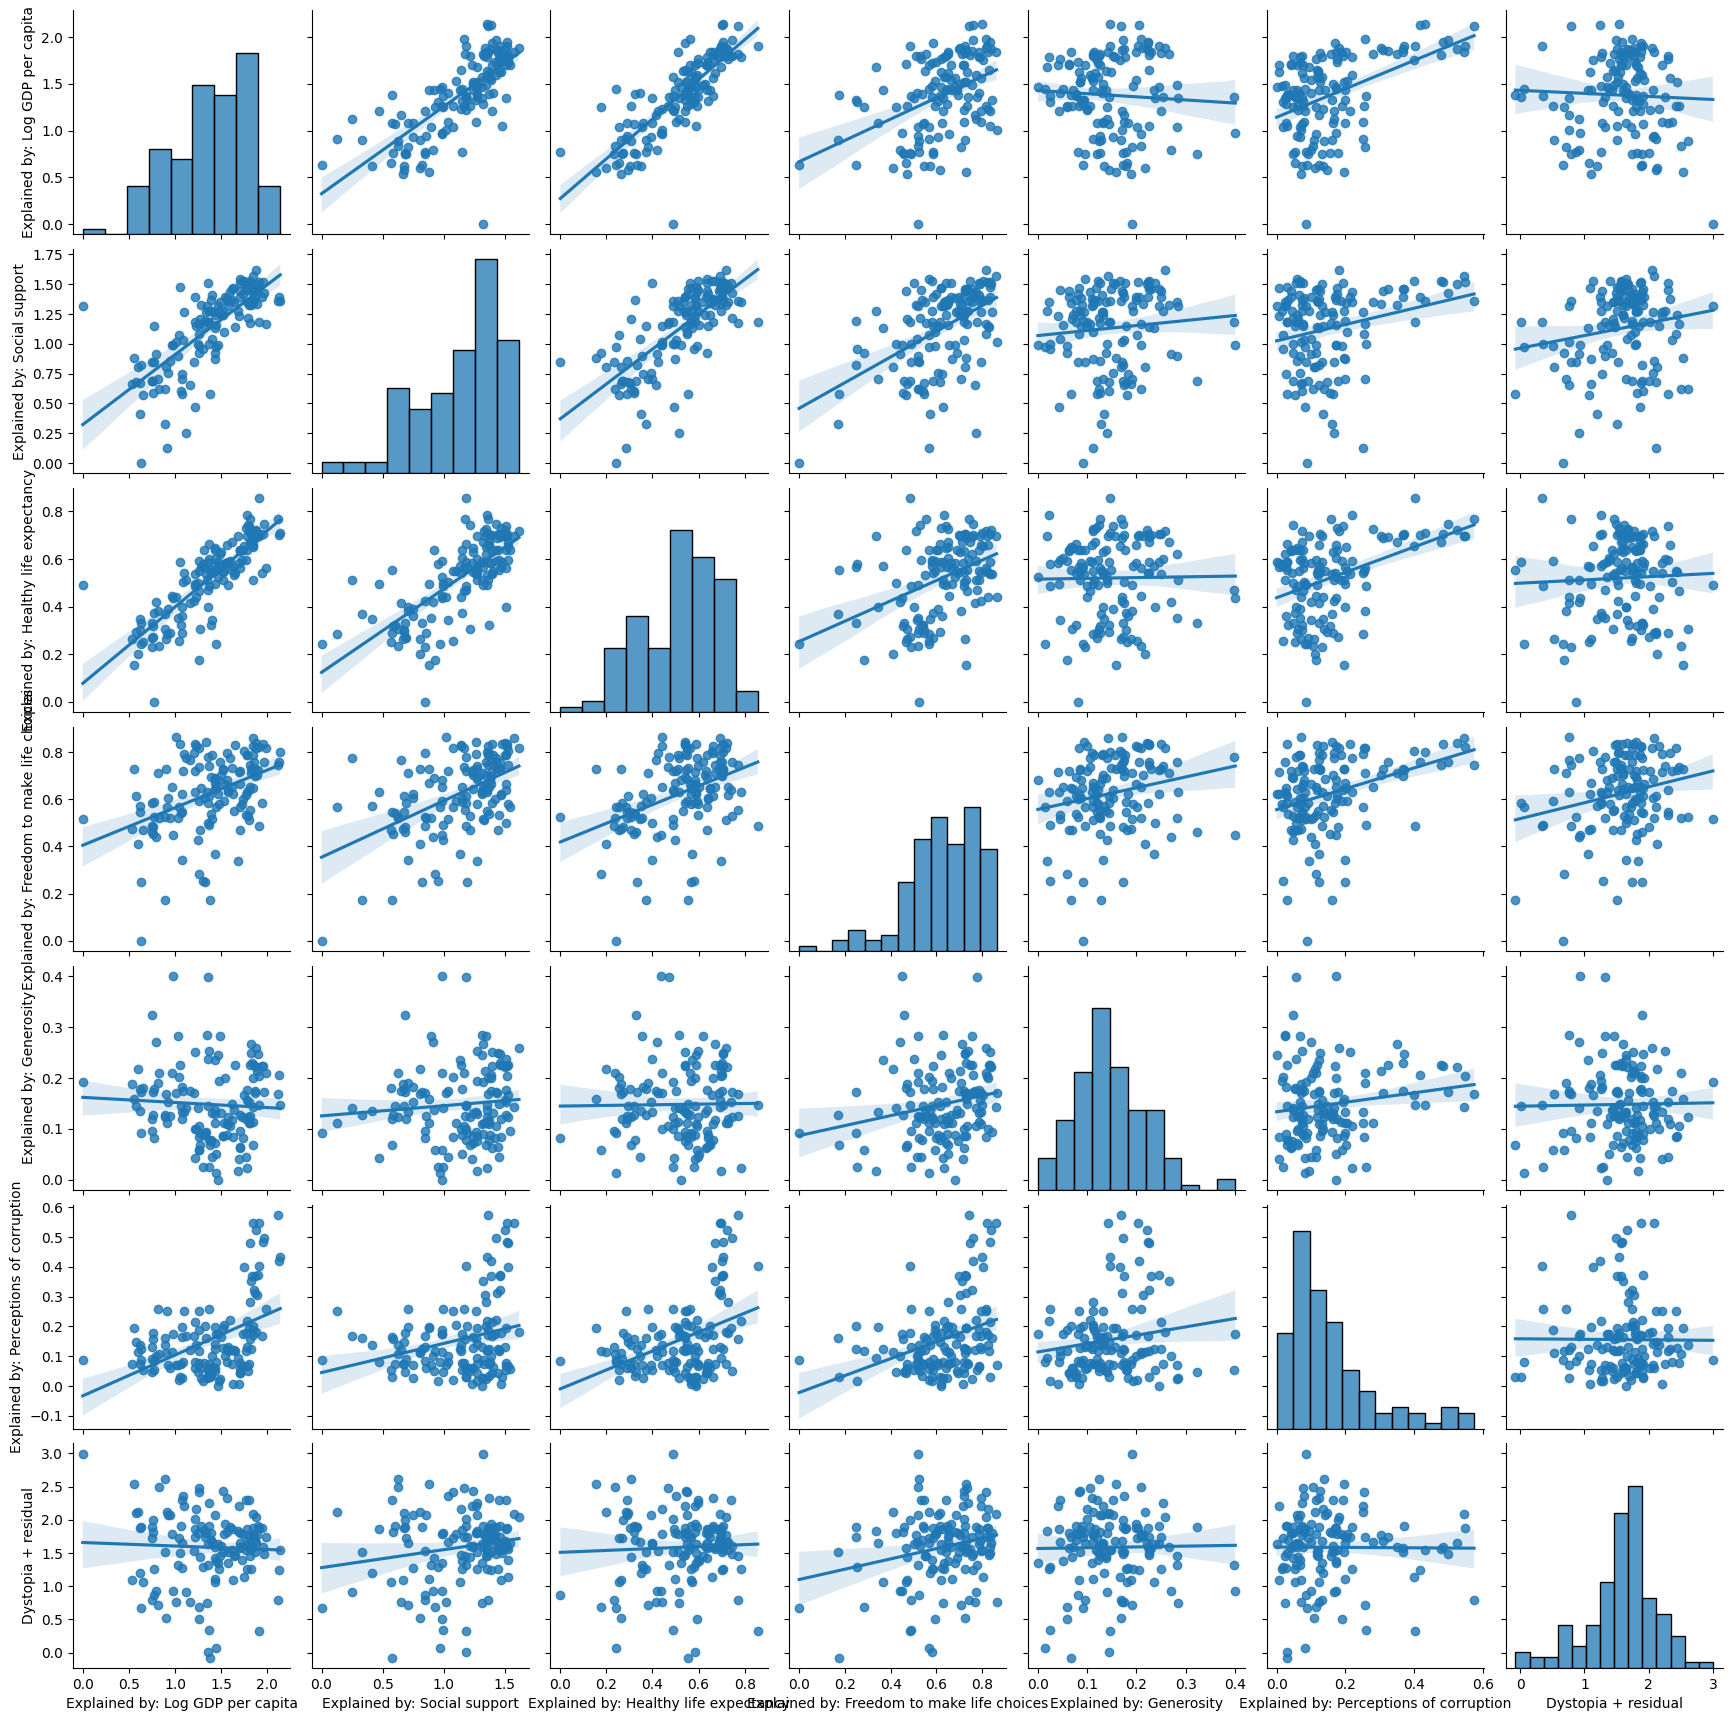

In [17]:
correlations = df[['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
                                 'Explained by: Freedom to make life choices', 'Explained by: Generosity','Explained by: Perceptions of corruption',
                                 'Dystopia + residual']]
sns.pairplot(correlations, kind='reg')

# 16. Multivariate Scatter Plots
A series of multivariate scatter plots are created to visualize the relationships between various factors contributing to happiness. Each plot includes a third variable as the hue, adding an additional dimension to the visualization.
- **Plot 1**: Ladder score vs GDP per capita, colored by freedom to make life choices
- **Plot 2**: Healthy life expectancy vs social support, colored by ladder score
- **Plot 3**: Social support vs GDP per capita, colored by ladder score
- **Plot 4**: Perceptions of corruption vs freedom to make life choices, colored by GDP per capita
These plots help identify complex relationships and patterns between multiple factors, providing insights into the interactions driving happiness.

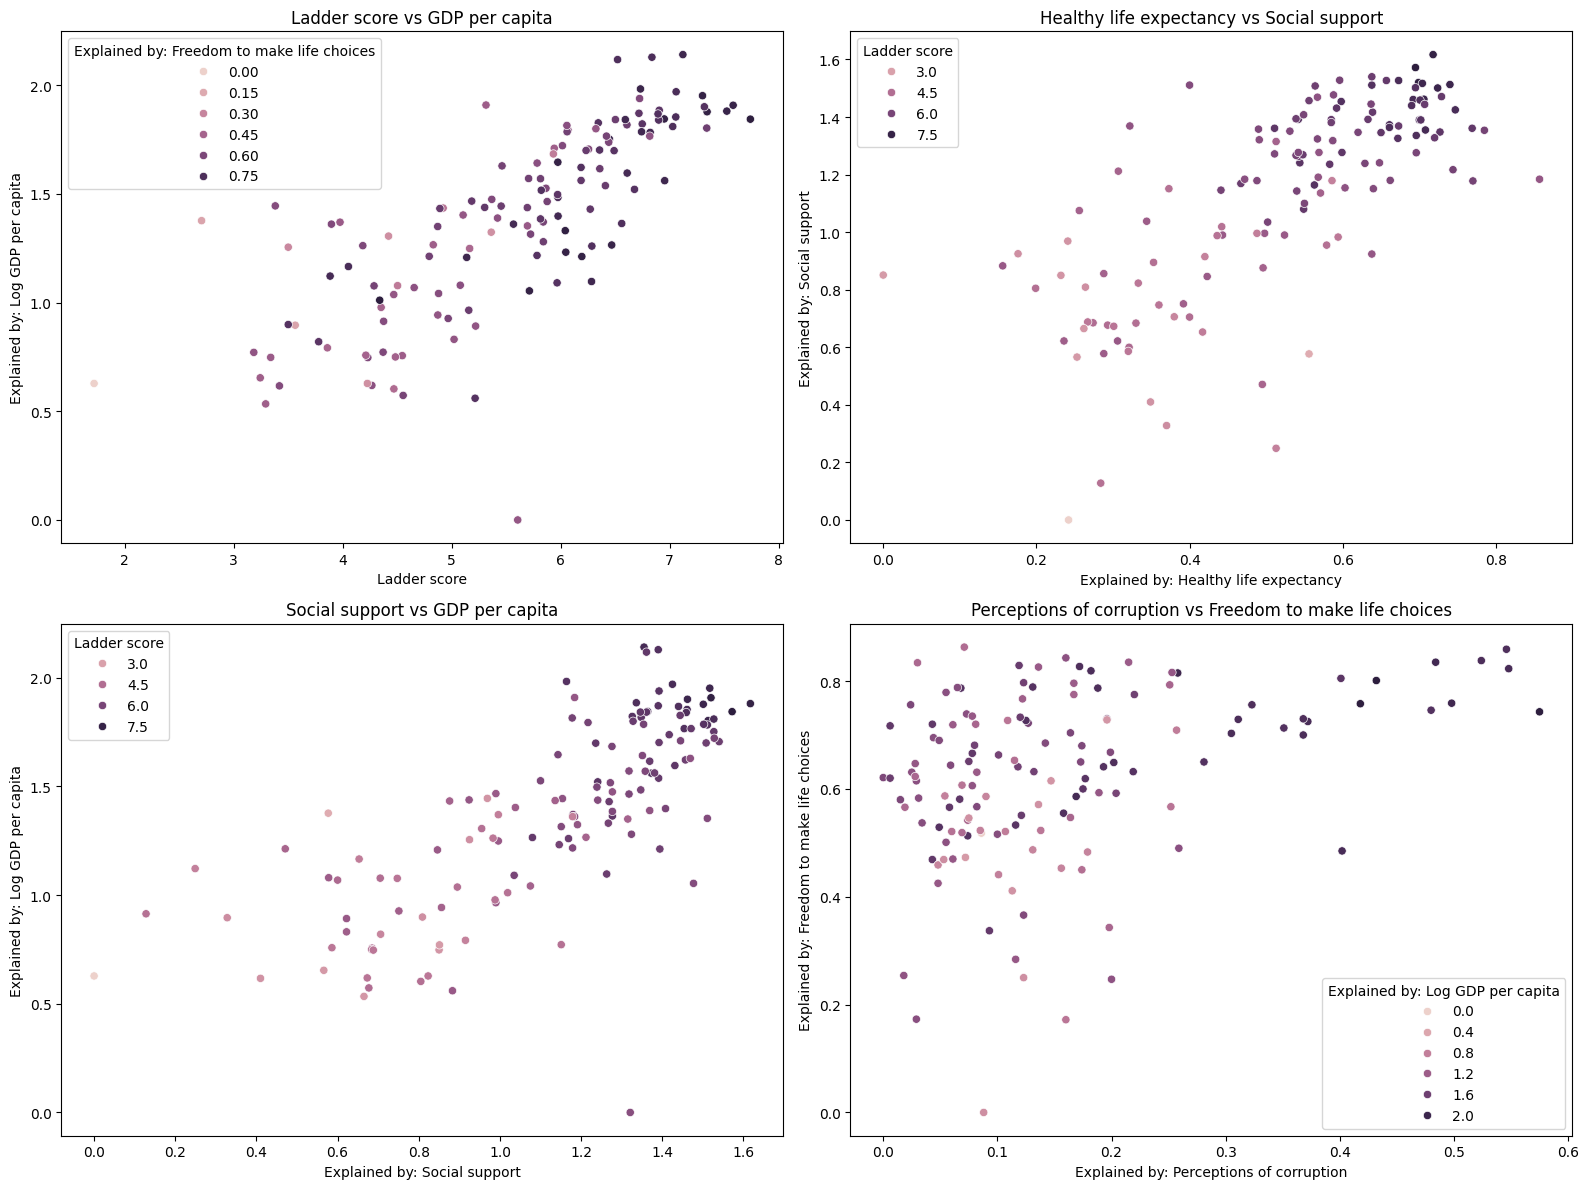

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='Ladder score', y='Explained by: Log GDP per capita', hue='Explained by: Freedom to make life choices', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Ladder score vs GDP per capita')

sns.scatterplot(x='Explained by: Healthy life expectancy', y='Explained by: Social support', hue='Ladder score', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Healthy life expectancy vs Social support')

sns.scatterplot(x='Explained by: Social support', y='Explained by: Log GDP per capita', hue='Ladder score', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Social support vs GDP per capita')

sns.scatterplot(x='Explained by: Perceptions of corruption', y='Explained by: Freedom to make life choices', hue='Explained by: Log GDP per capita', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Perceptions of corruption vs Freedom to make life choices')

plt.tight_layout()
plt.show()

# 17. Pairplot with KDE and Ladder Score
A pairplot is created to visualize the relationships between the ladder score and age group scores. The plot includes kernel density estimates (KDE) on the diagonal and scatter plots in the upper and lower triangles.
- **Diagonal plots**: KDE plots showing the distribution of each age group score and ladder score
- **Upper and lower triangle plots**: Scatter plots showing the relationships between each pair of age group scores and ladder score
This visualization helps identify patterns, correlations, and potential relationships between age groups and happiness, providing insights into how happiness varies across different age groups.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/mnt/f/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variabl

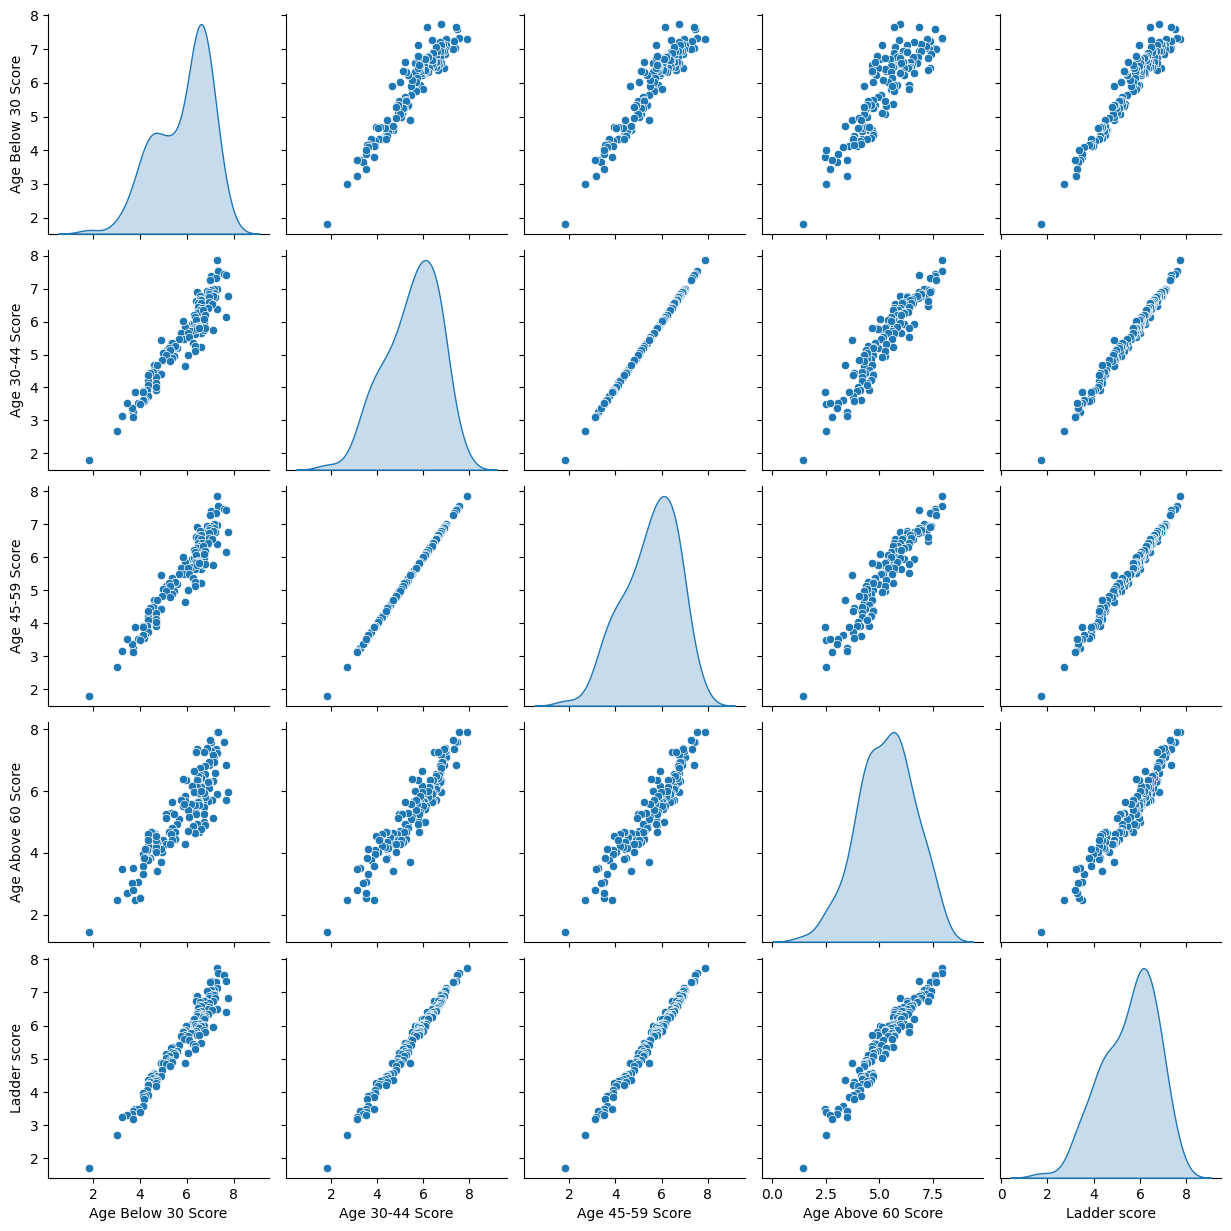

In [20]:
sns.pairplot(df[['Age Below 30 Score', 'Age 30-44 Score', 'Age 45-59 Score', 'Age Above 60 Score', 'Ladder score']], 
             diag_kind='kde', palette='coolwarm')
plt.show()

# 18. Correlation Heatmap
A correlation heatmap is created to visualize the relationships between different age groups' scores and the ladder score. The heatmap displays the correlation coefficients, providing insights into the strength and direction of the relationships.
- **Color scheme**: The 'coolwarm' colormap is used to represent positive and negative correlations.
- **Annotations**: Correlation coefficients are displayed on the heatmap for easy interpretation.
This visualization helps identify patterns and correlations between age groups and happiness, informing further analysis and modeling efforts.

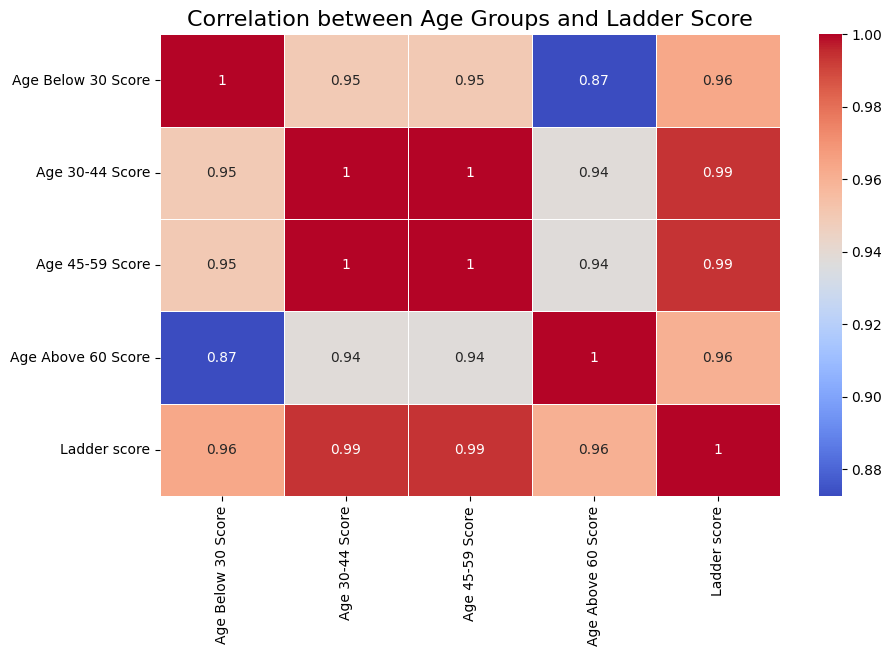

In [22]:
plt.figure(figsize=(10, 6))
corr = df[['Age Below 30 Score', 'Age 30-44 Score', 'Age 45-59 Score', 'Age Above 60 Score', 'Ladder score']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Age Groups and Ladder Score', fontsize=16)
plt.show()

# 19. Linear Regression Plot
A linear regression plot is created to visualize the relationship between the ladder score and GDP per capita. The plot displays the data points and the fitted linear regression line.
- **Data points**: The scatter plot represents the relationship between ladder score and GDP per capita.
- **Linear fit**: The black line represents the fitted linear regression model, with the equation displayed in the legend.
This visualization helps identify the strength and direction of the relationship between ladder score and GDP per capita, providing insights into the impact of economic factors on happiness.

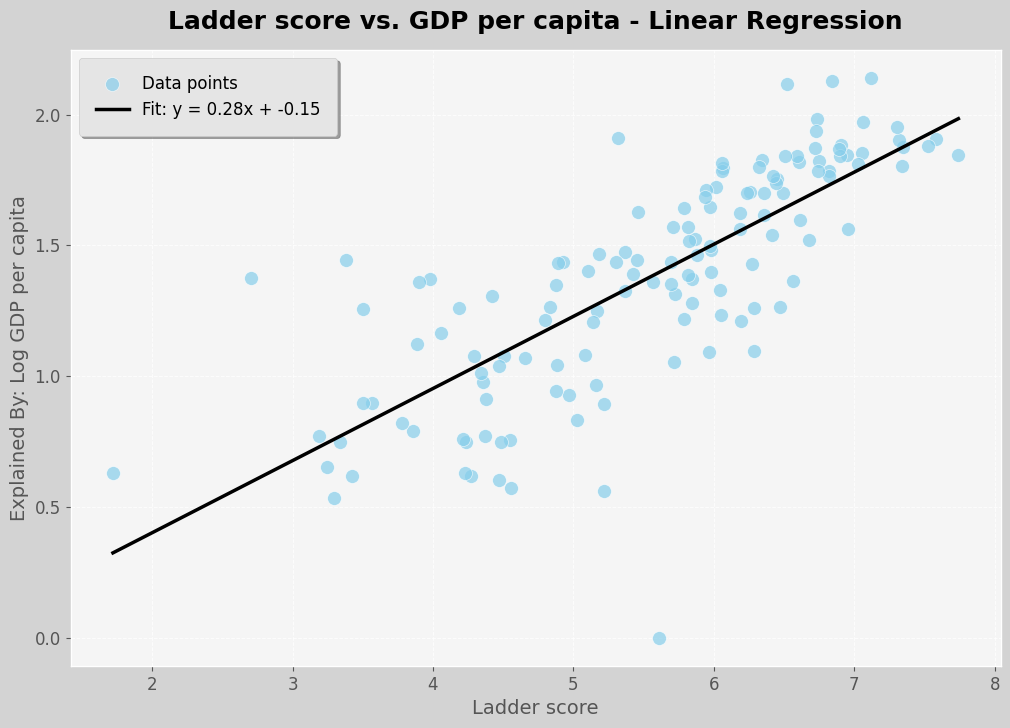

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation (uncomment the following line and use your DataFrame instead)
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Example variables
x = df['Ladder score']
y = df['Explained by: Log GDP per capita']

# Perform linear fit
m, c = np.polyfit(x, y, 1)

# Set figure and axes colors
plt.style.use('ggplot')
plt.figure(figsize=(12, 8), facecolor='lightgrey')  # Change figure background color here

plt.scatter(x, y, label="Data points", color='skyblue', s=100, edgecolor='white', alpha=0.7)
plt.plot(x, m * x + c, color='black', linewidth=2.5, label=f"Fit: y = {m:.2f}x + {c:.2f}")

# Set axes background color
plt.gca().set_facecolor('whitesmoke')  # Change axes background color here

# Title and labels
plt.title('Ladder score vs. GDP per capita - Linear Regression', fontsize=18, weight='bold', pad=15)
plt.xlabel('Ladder score', fontsize=14)
plt.ylabel('Explained By: Log GDP per capita', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)
plt.legend(frameon=True, fontsize=12, loc='upper left', fancybox=True, shadow=True, borderpad=1)

# Show the plot
plt.show()

# 20. Histogram with KDE
A histogram is created to visualize the distribution of ladder scores. The plot includes a kernel density estimate (KDE) curve, providing insights into the shape of the distribution.
- **Custom colors**: The plot uses custom colors for the histogram, title, and labels.
- **KDE curve**: The KDE curve provides a smoothed representation of the distribution.
This visualization helps understand the distribution of ladder scores, identifying patterns such as skewness or multimodality.

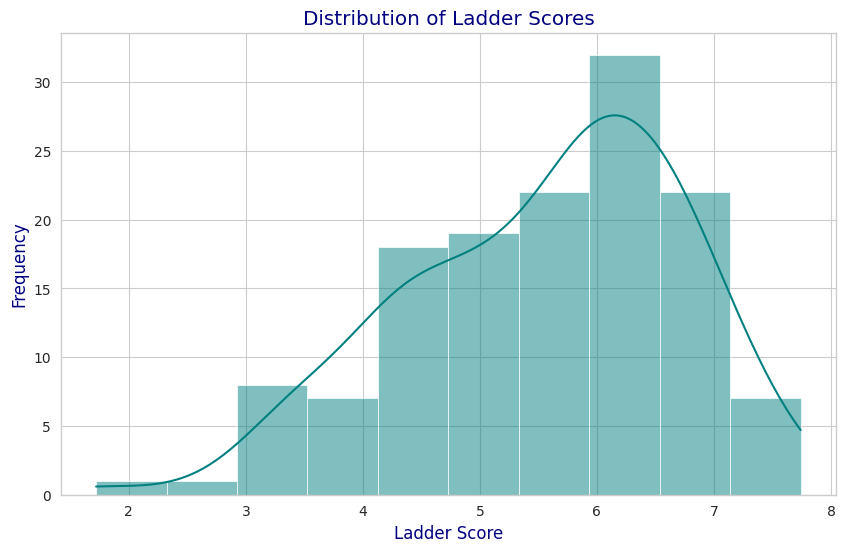

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and background color
sns.set_style("whitegrid")  # You can use 'darkgrid', 'white', 'dark', 'ticks', etc.
plt.figure(figsize=(10, 6), facecolor='white')  # Change facecolor to your desired background color

# Create the histogram with custom colors
sns.histplot(df['Ladder score'], bins=10, kde=True, color='teal')  # Change 'teal' to your preferred color

# Set the title and labels
plt.title('Distribution of Ladder Scores', color='navy')  # Title color
plt.xlabel('Ladder Score', color='navy')  # X-axis label color
plt.ylabel('Frequency', color='navy')  # Y-axis label color

# Show the plot
plt.show()

# 21. Bubble Plot
A bubble plot is created to visualize the relationship between GDP per capita and ladder score, with bubble size representing healthy life expectancy.
- **Bubble size**: The size of each bubble represents the healthy life expectancy value.
- **Relationship**: The plot shows the relationship between GDP per capita and ladder score.
This visualization helps identify patterns and correlations between economic factors, health outcomes, and happiness.

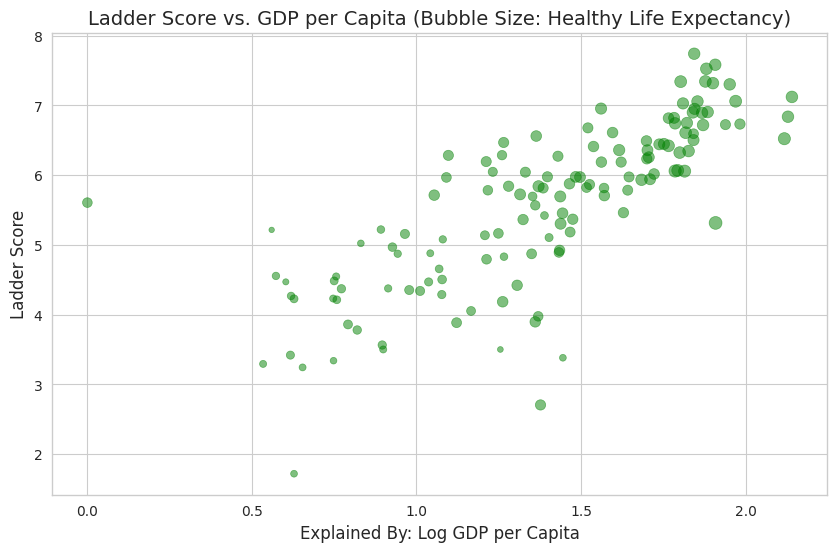

In [22]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6), facecolor='white')  # Change figure background color
plt.scatter(
    df['Explained by: Log GDP per capita'], 
    df['Ladder score'], 
    s=df['Explained by: Healthy life expectancy'] * 100, 
    alpha=0.5, 
    color='green'  # Change marker color
)

# Set axis background color
plt.gca().set_facecolor('white')  # Change axis background color

# Add titles and labels
plt.title('Ladder Score vs. GDP per Capita (Bubble Size: Healthy Life Expectancy)', fontsize=14)
plt.xlabel('Explained By: Log GDP per Capita', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)

# Show the plot
plt.show()

# 22. Bubble Plot: Healthy Life Expectancy vs GDP per Capita
A bubble plot is created to visualize the relationship between healthy life expectancy and GDP per capita, with bubble size representing generosity.
- **Bubble size**: The size of each bubble represents the generosity value.
- **Relationship**: The plot shows the relationship between healthy life expectancy and GDP per capita.
This visualization helps identify patterns and correlations between health outcomes, economic factors, and generosity.

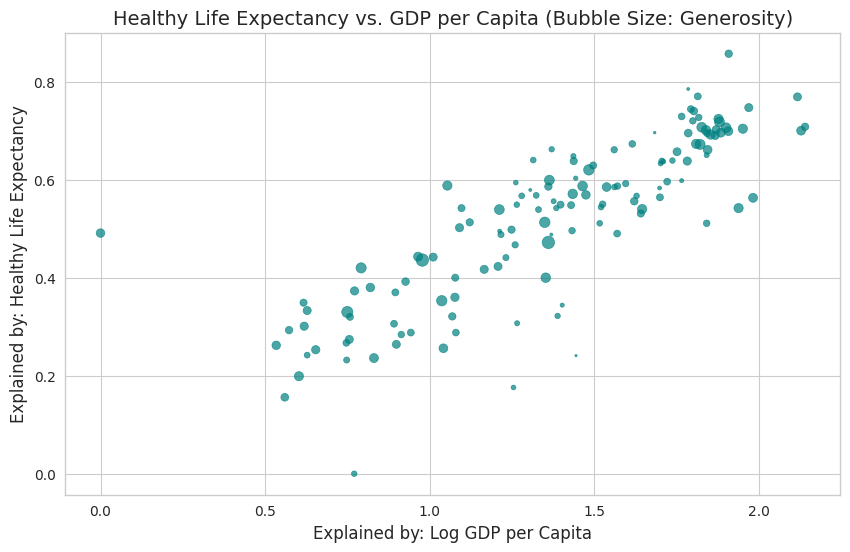

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot with custom point colors and background color
plt.figure(figsize=(10, 6))

# Set the background color
plt.gca().set_facecolor('white')  # Change to your desired background color

# Create scatter plot with custom colors for points
scatter = plt.scatter(df['Explained by: Log GDP per capita'], 
                      df['Explained by: Healthy life expectancy'],
                      s=df['Explained by: Generosity']*200, alpha=0.7, color='teal')  # Change 'orange' to your desired point color

# Add title and labels
plt.title('Healthy Life Expectancy vs. GDP per Capita (Bubble Size: Generosity)', fontsize=14)
plt.xlabel('Explained by: Log GDP per Capita', fontsize=12)
plt.ylabel('Explained by: Healthy Life Expectancy', fontsize=12)

# Show the plot
plt.show()

# 23. Bubble Plot: Social Support vs Freedom to Make Life Choices
A bubble plot is created to visualize the relationship between social support and freedom to make life choices, with bubble size representing healthy life expectancy.
- **Bubble size**: The size of each bubble represents the healthy life expectancy value.
- **Relationship**: The plot shows the relationship between social support and freedom to make life choices.
This visualization helps identify patterns and correlations between social factors, personal freedoms, and health outcomes.

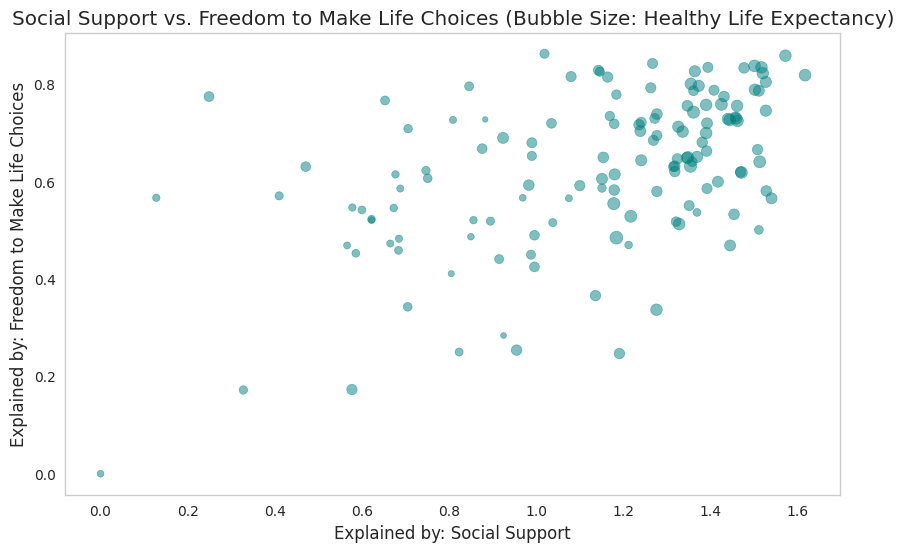

In [27]:
import matplotlib.pyplot as plt

# Create a scatter plot with custom point color and background color
plt.figure(figsize=(10, 6))

# Change point color to blue and background color to light gray
plt.scatter(df['Explained by: Social support'], df['Explained by: Freedom to make life choices'], 
            s=df['Explained by: Healthy life expectancy'] * 100, alpha=0.5, color='teal')

# Change the background color
plt.gca().set_facecolor('white')

plt.title('Social Support vs. Freedom to Make Life Choices (Bubble Size: Healthy Life Expectancy)')
plt.xlabel('Explained by: Social Support')
plt.ylabel('Explained by: Freedom to Make Life Choices')
plt.grid(True, color='white')  # Optional: Change grid color for better visibility
plt.show()

# 24. Linear Regression Model
A linear regression model is created to predict the ladder score based on various factors, including GDP per capita, healthy life expectancy, social support, freedom to make life choices, generosity, perceptions of corruption, and age group scores.
- **Features**: The model uses 10 features, including economic, health, social, and age-related variables.
- **Target variable**: The ladder score is the target variable being predicted.
- **Model performance**: The model is evaluated using mean squared error (MSE) and R² score.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare your DataFrame (df) as needed
# Selecting independent variables (features) and dependent variable (target)
X = df[['Explained by: Log GDP per capita', 'Explained by: Healthy life expectancy', 'Explained by: Social support', 
         'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
         'Age Below 30 Score', 'Age 30-44 Score', 'Age 45-59 Score', 'Age Above 60 Score']]
y = df['Ladder score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the coefficients and model performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Coefficients: [ 0.00706822 -0.00299334  0.01144377  0.0142918   0.00192976 -0.01314055
  0.24788695  0.44365612  0.05721071  0.24899345]
Intercept: -0.017371175749815393
Mean Squared Error: 0.00012559600595341672
R² Score: 0.9999057835189213


# 25. Scatter Plots with Regression Lines
A series of scatter plots are created to visualize the relationships between each feature and the ladder score, with regression lines added to illustrate the predicted relationships.
- **Customizable plot styles**: The plots use custom colors for the scatter points, regression lines, and background.
- **Regression lines**: The regression lines are based on the predictions from the linear regression model.
This visualization helps identify the relationships between each feature and the ladder score, providing insights into the drivers of happiness.

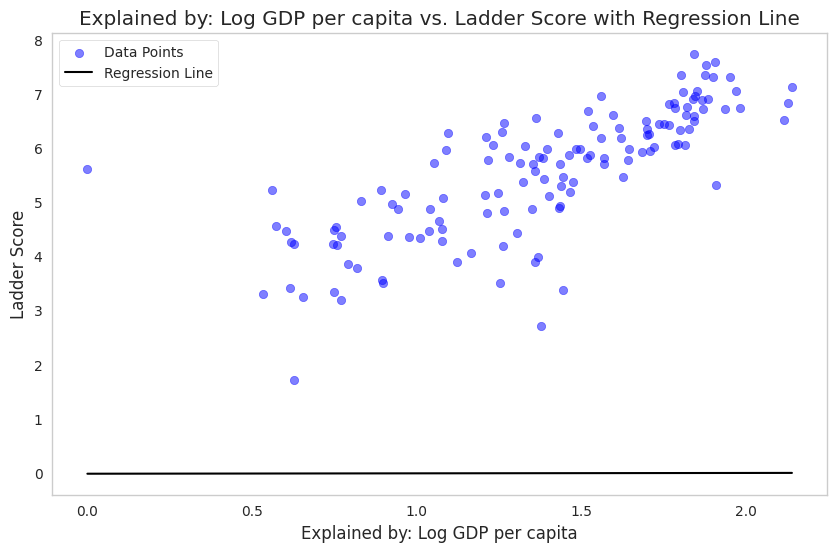

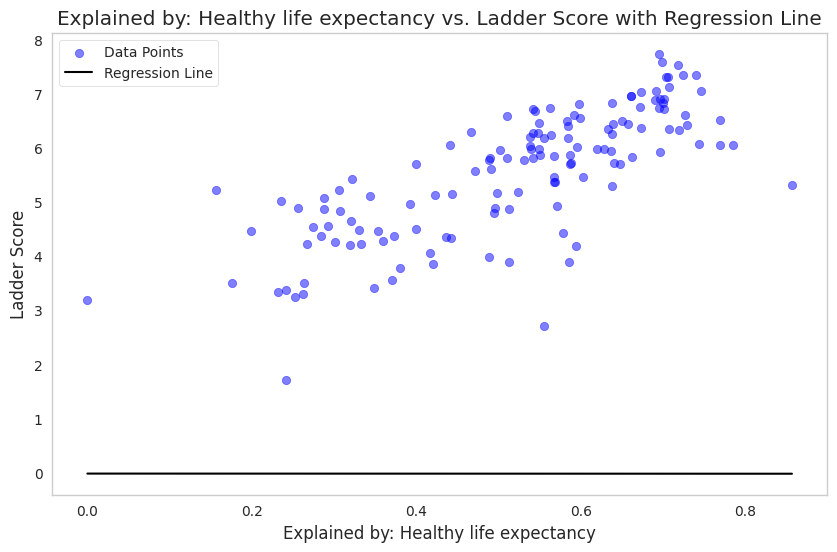

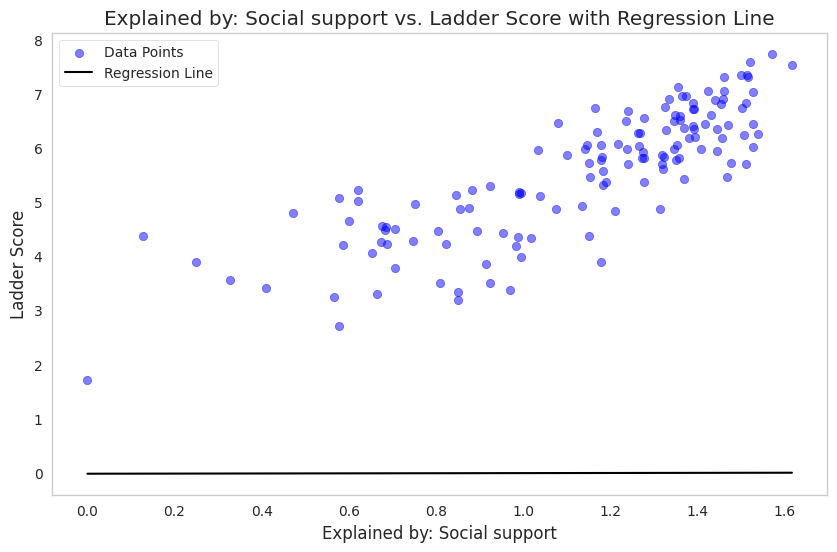

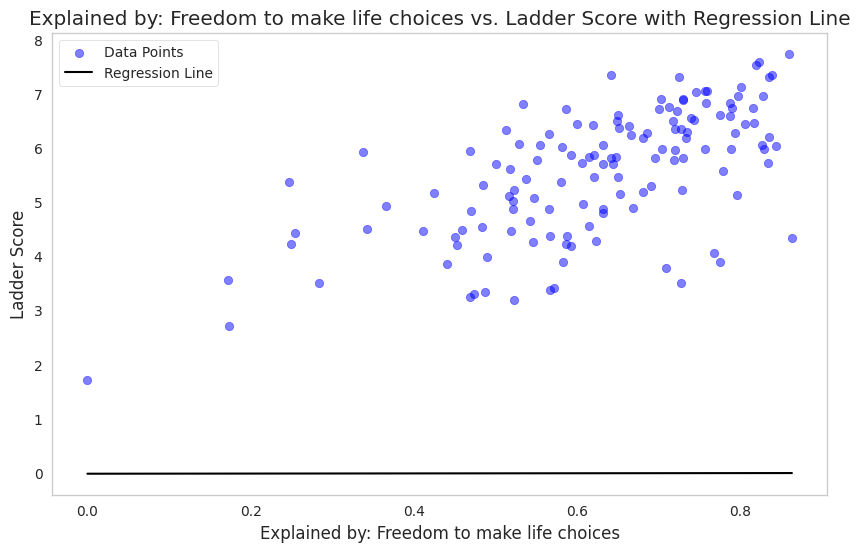

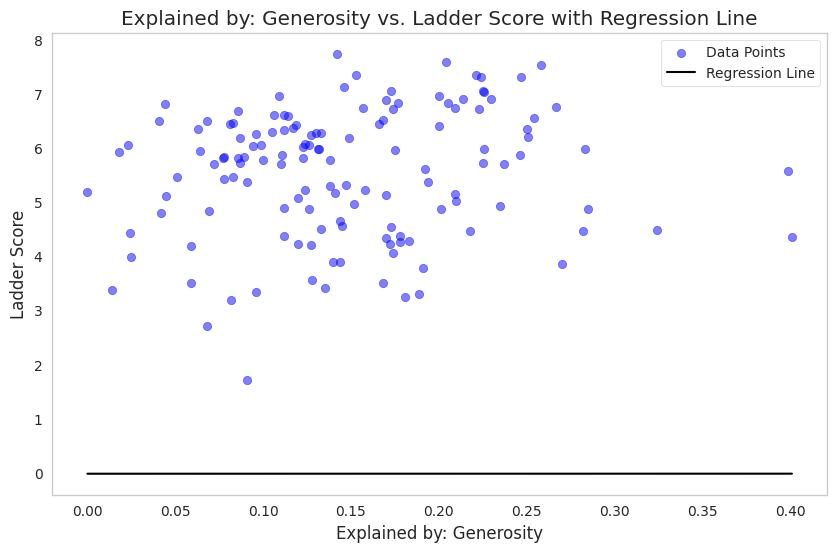

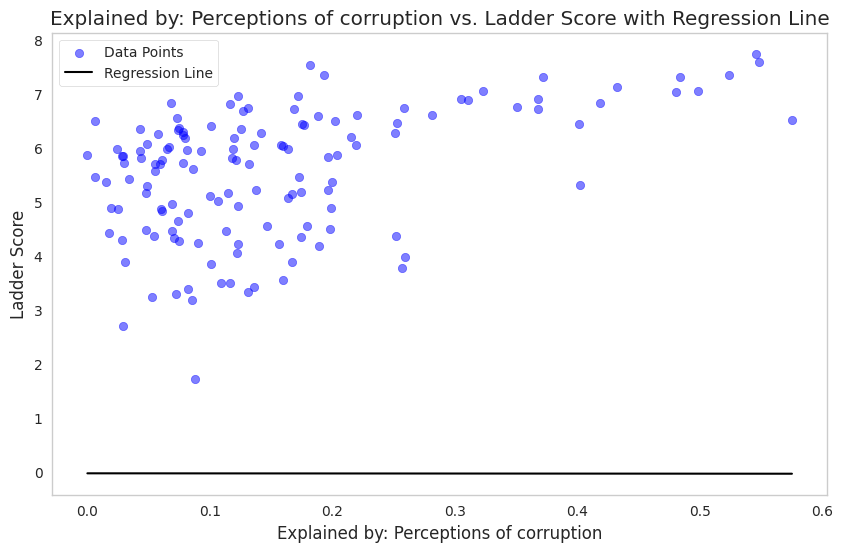

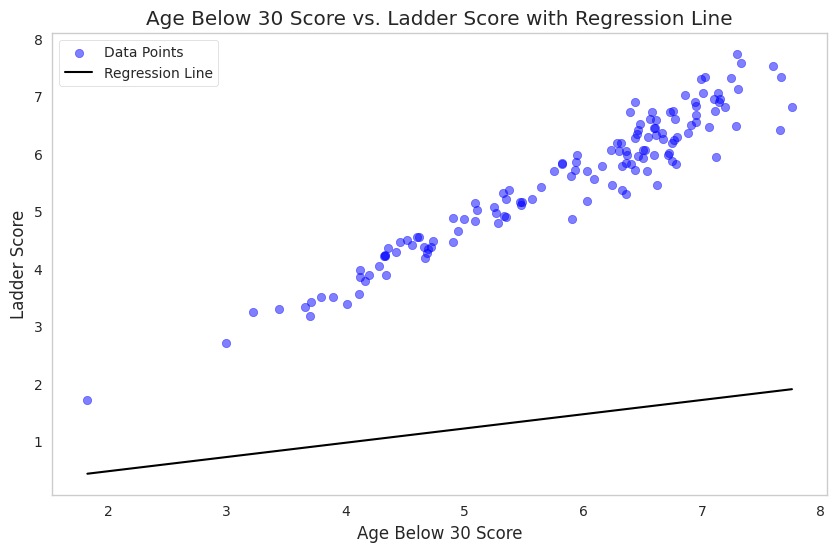

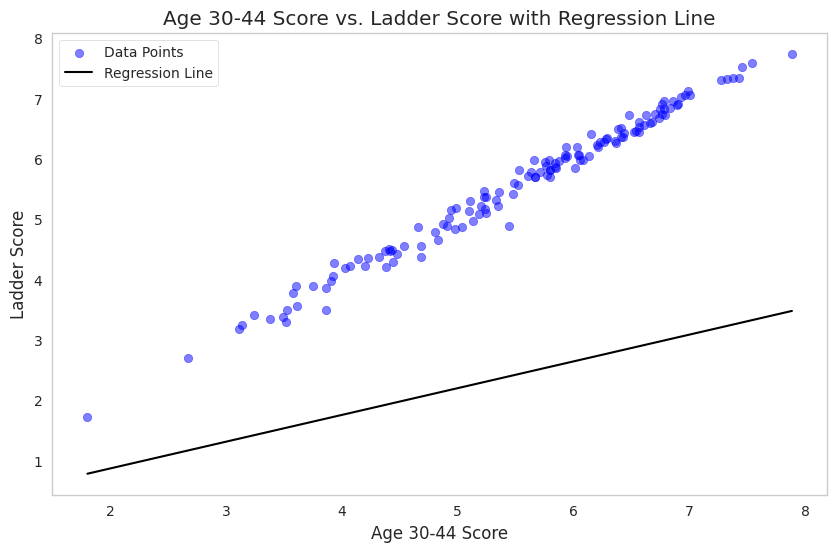

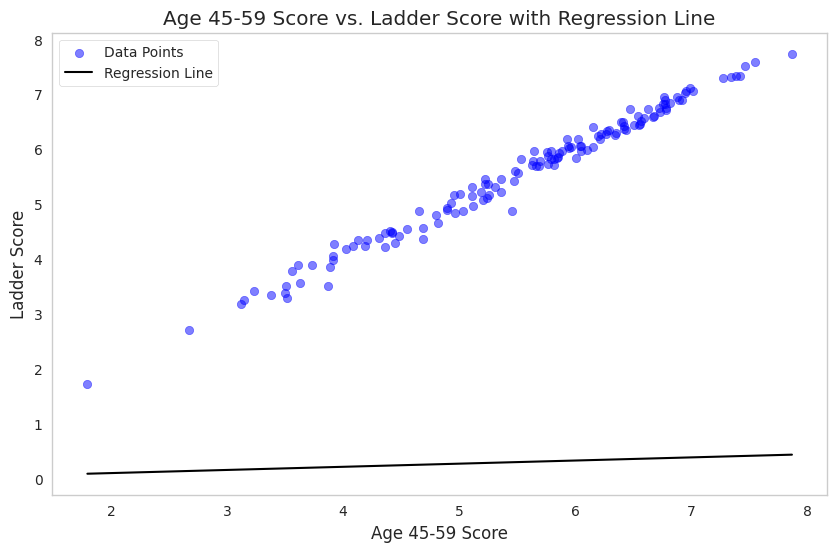

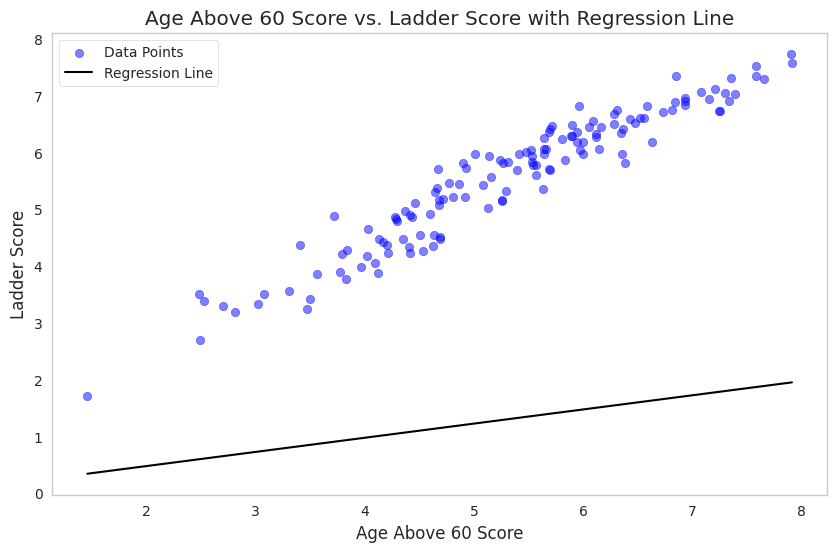

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot scatter plot with regression line
def plot_regression(X, y, feature_name, scatter_color='blue', line_color='red', bg_color='lightgrey'):
    plt.figure(figsize=(10, 6))
    
    # Set background color
    plt.gca().set_facecolor(bg_color)
    
    # Scatter plot
    plt.scatter(X[feature_name], y, color=scatter_color, alpha=0.5, label='Data Points')
    
    # Create the regression line
    X_fit = np.linspace(X[feature_name].min(), X[feature_name].max(), 100).reshape(-1, 1)
    X_fit_full = pd.DataFrame(
    np.zeros((100, X.shape[1])),
    columns=X.columns
    )
    X_fit_full[feature_name] = X_fit.flatten()
    y_fit = model.predict(X_fit_full)
    
    # Regression line
    plt.plot(X_fit, y_fit, color=line_color, label='Regression Line')
    
    plt.title(f'{feature_name} vs. Ladder Score with Regression Line')
    plt.xlabel(feature_name)
    plt.ylabel('Ladder Score')
    plt.legend()
    plt.grid()
    plt.show()

# Plot regression for each feature with custom colors
for feature in X.columns:
    plot_regression(X, y, feature, scatter_color='blue', line_color='black', bg_color='white')

# 26. Histogram of Residuals
A histogram is created to visualize the distribution of residuals from the linear regression model.
- **Residuals**: The differences between actual and predicted values.
- **Distribution**: The histogram shows the shape of the residual distribution.
This visualization helps evaluate the model's performance and identify potential issues, such as non-normality or outliers.

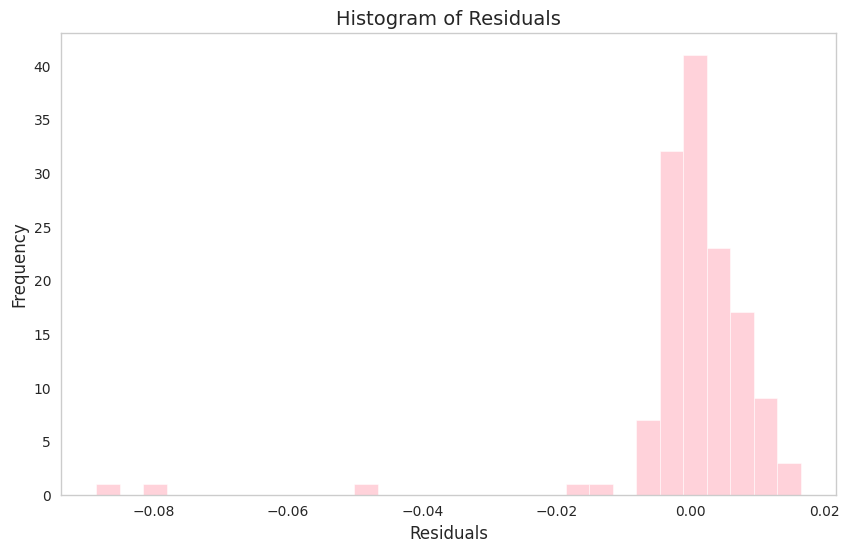

In [35]:
# Predict y using the trained model
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Now plot the histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('white')  # Background color
plt.hist(residuals, bins=30, color='pink', alpha=0.7)
plt.title('Histogram of Residuals', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

# 27. Coefficients of Features
A horizontal bar chart is created to visualize the coefficients of the features in the linear regression model.
- **Coefficient values**: The chart shows the magnitude and direction of each feature's impact on the target variable.
- **Feature importance**: The chart helps identify the most important features in the model.
This visualization provides insights into the relationships between the features and the target variable.

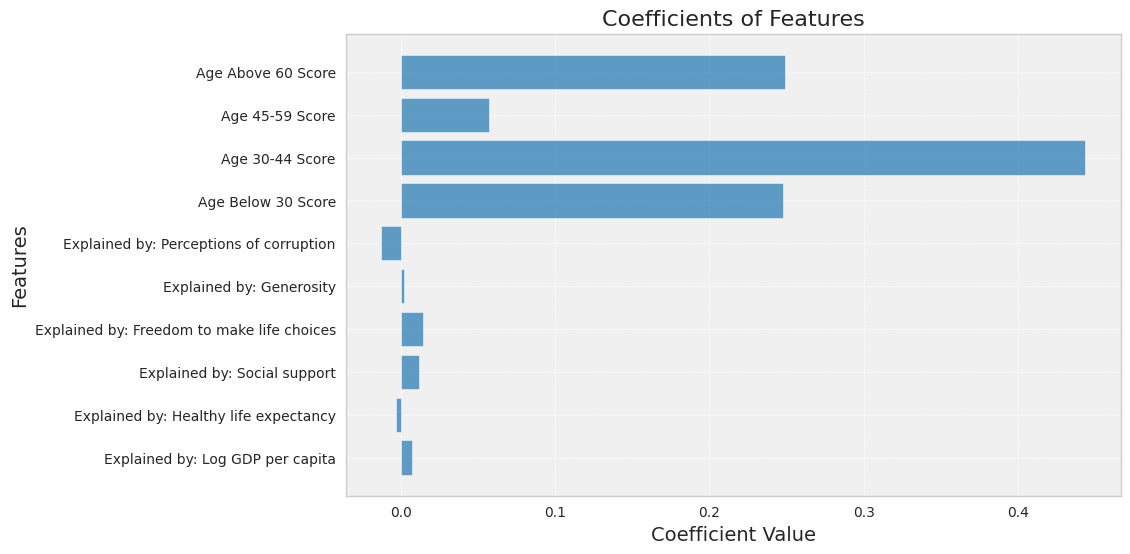

In [36]:
# Plotting coefficients
import matplotlib.pyplot as plt

# Sample coefficients for demonstration; replace with actual model coefficients
# model.coef_ = [...]  # Uncomment this line and assign actual model coefficients

# Create a horizontal bar chart with customized colors
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.coef_, color='#1f77b4', alpha=0.7)  # Change bar color to a different shade
plt.title('Coefficients of Features', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Change background color
plt.gca().set_facecolor('#f0f0f0')  # Light grey background color

plt.grid(color='white', linestyle='--', linewidth=0.5)  # Optional: customize grid color and style
plt.show()

# 28. Random Forest Regression
A random forest regression model is created to predict the ladder score based on various factors, including GDP per capita, healthy life expectancy, social support, freedom to make life choices, generosity, perceptions of corruption, and age group scores.
- **Feature scaling**: The features are scaled using StandardScaler to improve model performance.
- **Model evaluation**: The model is evaluated using mean squared error (MSE) and R² score.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final_data.csv')  # Uncomment and set your file path

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle them as needed)
df.dropna(inplace=True)

# Selecting independent variables (features) and dependent variable (target)
X = df[['Explained by: Log GDP per capita', 'Explained by: Healthy life expectancy', 'Explained by: Social support', 
         'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
         'Age Below 30 Score','Age 30-44 Score', 'Age 45-59 Score', 'Age Above 60 Score']]
y = df['Ladder score']
# Scale f Scoreeatures (opti Scoreonal butAbove  reScorended for tree-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Country                                       0
Rank                                          0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
Age Below 30 Score                            0
Age Above 60 Score                            0
Age 30-44 Score                               0
Age 45-59 Score                               0
dtype: int64


# 29. Training the Random Forest Model
A random forest regressor model is trained on the training data to predict the ladder score.
- **Model parameters**: The model uses 100 estimators and a random state of 42 for reproducibility.
- **Training data**: The model is trained on the scaled training data.
This step is crucial in developing a predictive model that can accurately forecast ladder scores based on various factors.

In [38]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 30. Making Predictions
The trained random forest regressor model is used to make predictions on the testing data.
- **Predictions**: The model generates predicted values for the ladder score based on the input features.
- **Output**: The predicted values are printed to the console.
This step is essential in evaluating the model's performance and identifying areas for improvement.

In [39]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)

Predictions: [4.41669 4.42147 6.86695 6.68636 3.80465 5.84136 5.99686 4.021   3.20045
 5.17469 5.18664 6.19094 5.75631 5.59506 6.36315 6.23574 6.66314 6.75806
 3.39547 5.79122 3.76406 7.35991 4.34696 6.09035 5.1034  4.97443 6.84267
 6.7283 ]


# 31. Evaluating Model Performance
The performance of the random forest regressor model is evaluated using mean squared error (MSE) and R² score.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **R² Score**: Measures the proportion of variance in the target variable explained by the model.
This step provides insights into the model's accuracy and goodness of fit.

In [40]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.014531954803571367
R² Score: 0.9890987803760658


# 32. Feature Importance Plot
A bar chart is created to visualize the feature importance of the random forest regressor model.
- **Feature importance**: The chart shows the relative importance of each feature in predicting the target variable.
- **Sorted features**: The features are sorted in descending order of importance.
This visualization helps identify the most influential features in the model.

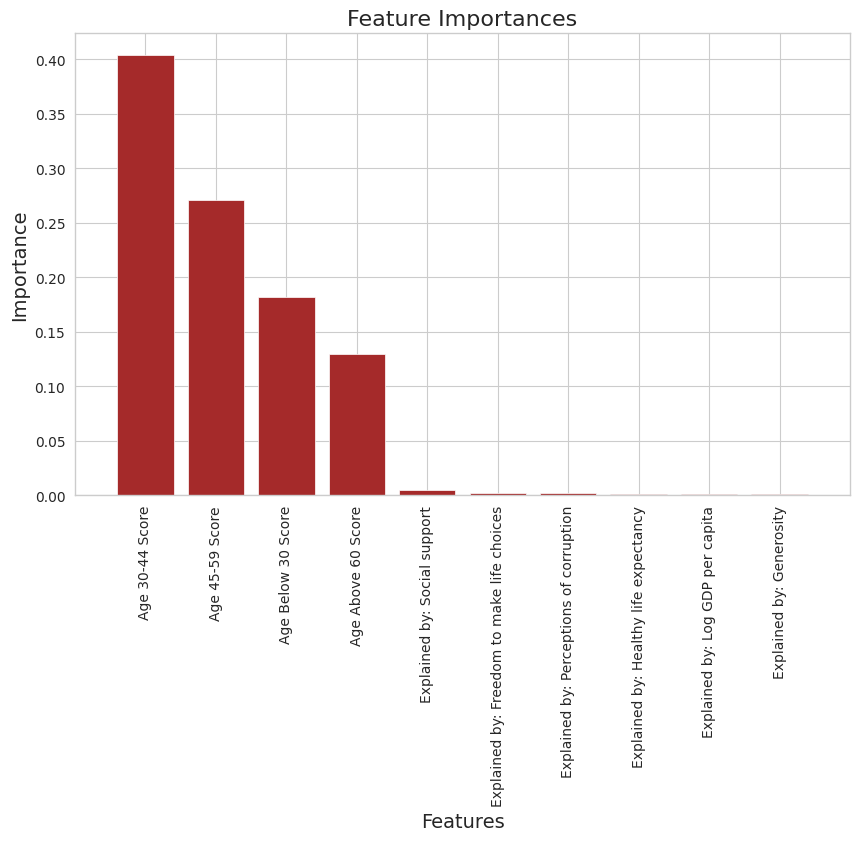

In [41]:
# Plotting feature importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], align="center", color='brown')  # Change bar color here
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

# Change the background color
plt.gca().set_facecolor('white')  # Change to your desired background color

plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()

# 33. Actual vs. Predicted Values Plot
A scatter plot is created to visualize the relationship between actual and predicted ladder scores.
- **Actual values**: The x-axis represents the actual ladder scores.
- **Predicted values**: The y-axis represents the predicted ladder scores.
- **Perfect prediction line**: A dashed line represents perfect predictions, where actual and predicted values are equal.
This visualization helps evaluate the model's performance and identify patterns or biases.

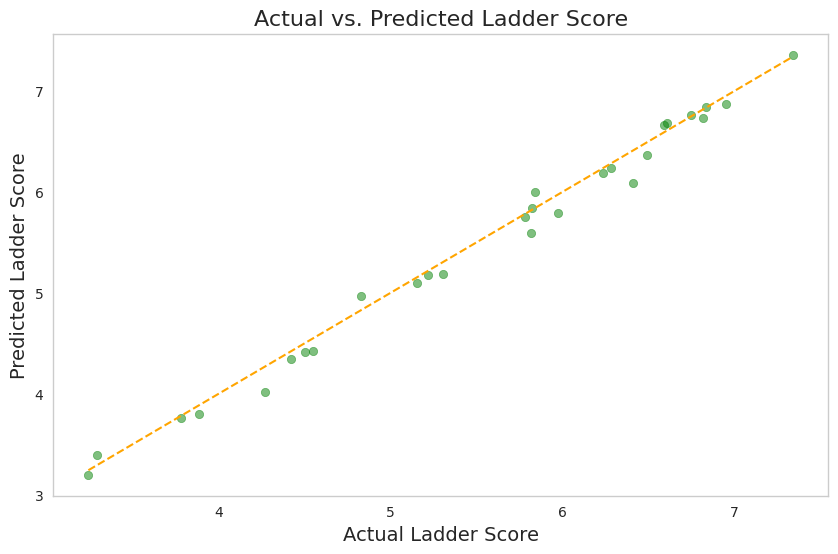

In [42]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)  # Change point color to green
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--')  # Change line color to orange

# Set background color
plt.gca().set_facecolor('white')  # Change background color to light grey

# Set title and labels
plt.title('Actual vs. Predicted Ladder Score', fontsize=16)
plt.xlabel('Actual Ladder Score', fontsize=14)
plt.ylabel('Predicted Ladder Score', fontsize=14)

# Show grid
plt.grid(color='white')  # Change grid color to white for better visibility

# Show the plot
plt.show()

# 34. Classification Problem Setup
A classification problem is set up by converting the continuous 'Ladder score' into a categorical variable 'Ladder Score Category'.
- **Categorical variable**: The 'Ladder Score Category' is created using quantiles with labels 'Low', 'Medium', 'High', and 'Very High'.
- **Features**: The independent variables include factors such as GDP per capita, healthy life expectancy, social support, and age group scores.
- **Target variable**: The target variable is the categorical 'Ladder Score Category'.
This setup allows for classification modeling to predict the ladder score category based on the input features.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('final_data.csv')  # Uncomment and set your file path

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle them as needed)
df.dropna(inplace=True)

# Convert Ladder Score to categorical (for example, using quantiles)
bins = [0, 4, 6, 8, 10]  # Define bins (adjust according to your data)
labels = ['Low', 'Medium', 'High', 'Very High']  # Define class labels
df['Ladder Score Category'] = pd.cut(df['Ladder score'], bins=bins, labels=labels)

# Selecting independent variables (features) and dependent variable (target)
X = df[['Explained by: Log GDP per capita', 'Explained by: Healthy life expectancy', 'Explained by: Social support', 
         'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
         'Age Below 30 Score','Age 30-44 Score', 'Age 45-59 Score', 'Age Above 60 Score']]
y = df['Ladder score']

# Scale features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Country                                       0
Rank                                          0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
Age Below 30 Score                            0
Age Above 60 Score                            0
Age 30-44 Score                               0
Age 45-59 Score                               0
dtype: int64


# 35. Binary Classification
A binary classification problem is created by classifying the ladder scores based on the median value.
- **Median threshold**: The median value of the training data is used as a threshold to create binary labels.
- **Binary labels**: The labels are converted to binary (0 or 1) based on whether the score is above or below the median.
This approach allows for training a classifier to predict whether a score is above or below the median.

In [44]:
# For example, classify based on median value
median_score = y_train.median()

# Create binary labels
y_train_class = (y_train > median_score).astype(int)
y_test_class = (y_test > median_score).astype(int)

# Now train classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_class)

DecisionTreeClassifier(random_state=42)

# 36. Multi-Class Classification
A multi-class classification problem is created by categorizing the ladder scores into three categories: 'Low', 'Medium', and 'High'.
- **Quantile-based categorization**: The categories are defined based on the 33rd and 66th percentiles of the training data.
- **Decision Tree Classifier**: A decision tree classifier is trained to predict the category of the ladder score.
This approach allows for predicting the category of the ladder score based on the input features.

In [45]:
# Create 3 categories based on y_train values
y_train_class = pd.cut(y_train, bins=[-np.inf, y_train.quantile(0.33), y_train.quantile(0.66), np.inf], 
                       labels=['Low', 'Medium', 'High'])

y_test_class = pd.cut(y_test, bins=[-np.inf, y_test.quantile(0.33), y_test.quantile(0.66), np.inf], 
                      labels=['Low', 'Medium', 'High'])

# Train the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_class)

# Predict
y_pred = dt_classifier.predict(X_test)

print("Predictions:", y_pred)


Predictions: ['Low' 'Low' 'High' 'High' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Low'
 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'High' 'High' 'Low' 'Medium'
 'Low' 'High' 'Low' 'Medium' 'Medium' 'Low' 'High' 'High']


# 37. Evaluating Multi-Class Classification Performance
The performance of the decision tree classifier is evaluated using a classification report and a confusion matrix.
- **Classification Report**: The report provides precision, recall, and F1-score for each category.
- **Confusion Matrix**: The matrix shows the number of true positives, false positives, true negatives, and false negatives for each category.
This evaluation provides insights into the classifier's performance and identifies areas for improvement.

In [46]:
# Categorize y_test the same way as training
y_test_class = pd.cut(
    y_test, 
    bins=[-np.inf, y_test.quantile(0.33), y_test.quantile(0.66), np.inf], 
    labels=['Low', 'Medium', 'High']
)

# Now y_test_class and y_pred have the same format (both categorical)

# Print classification report
print("Classification Report:\n", classification_report(y_test_class, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.80      0.89        10
         Low       0.82      1.00      0.90         9
      Medium       0.78      0.78      0.78         9

    accuracy                           0.86        28
   macro avg       0.87      0.86      0.86        28
weighted avg       0.87      0.86      0.86        28

Confusion Matrix:
 [[8 0 2]
 [0 9 0]
 [0 2 7]]


# 38. Visualizing the Decision Tree
The decision tree classifier is visualized using a tree plot to understand its structure and decision-making process.
- **Feature names**: The feature names are displayed in the plot to understand the decision-making process.
- **Class names**: The class names ('Low', 'Medium', 'High') are displayed in the plot to understand the predicted categories.
This visualization helps understand the decision-making process of the classifier.

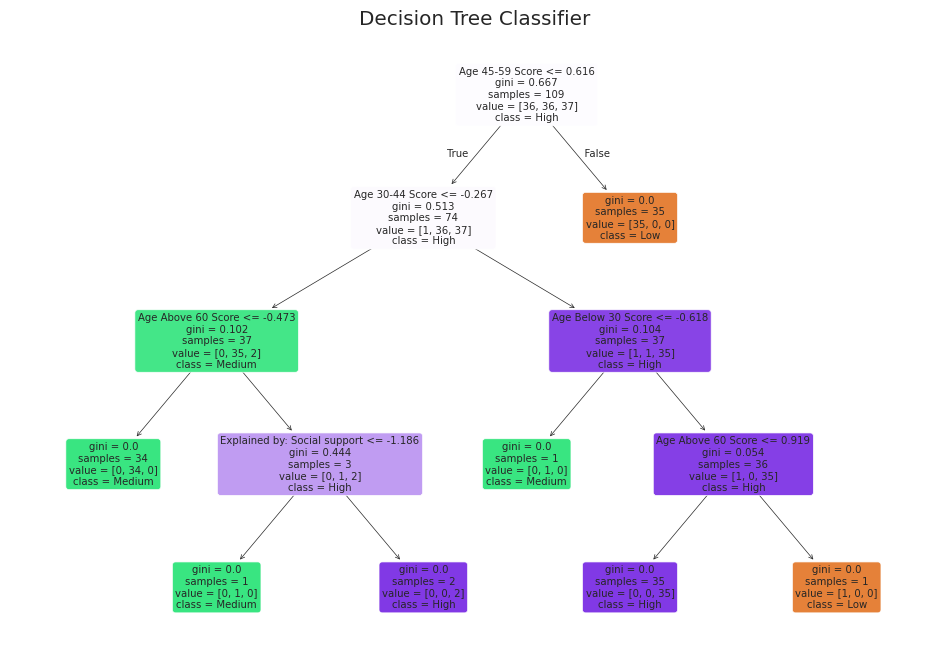

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=labels, filled=True, rounded=True)
plt.title('Decision Tree Classifier')
plt.show()